## Question: What is the likelihood that a customer of a bank will commit fraud?

+ Dataset: <https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/>

In [29]:
import os

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\gavin\\OneDrive\\Desktop\\Data Science Resources\\BA2'

In [3]:
data = pd.read_csv("Base.csv")

In [4]:
pd.set_option('display.max_columns' ,32)
pd.set_option('display.max_rows', 50)

In [5]:
data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


## Data Exploration and Cleaning
Here I looked at the datatypes for each column, checked for nulls, and attempt to get a better sense of the data to prepare for preprocessing/model building. A lot of the datasets on kaggle are made specifically for practicing model building, so I realized that the dataset I ended up using was already cleaned and did not have any nulls in it. However, this is where I noticed that there was an extremely high class imbalance. Our dataset had 1 million rows, but only 11029 of them were 1s (instances of fraud). This can lead to the models severely overfitting, so I had to think of a way to account for that. Before I tackled that problem, I split the data into training and test sets.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
# check for class imbalance
data['fraud_bool'].value_counts()

fraud_bool
0    988971
1     11029
Name: count, dtype: int64

In [8]:
# check for nulls

for column in data.columns:
    # Print column name
    print(f"Column: {column}")
    
    # Print the number of nulls
    null_count = data[column].isnull().sum()
    print(f"Nulls: {null_count}")
    
    print("-" * 30)

Column: fraud_bool
Nulls: 0
------------------------------
Column: income
Nulls: 0
------------------------------
Column: name_email_similarity
Nulls: 0
------------------------------
Column: prev_address_months_count
Nulls: 0
------------------------------
Column: current_address_months_count
Nulls: 0
------------------------------
Column: customer_age
Nulls: 0
------------------------------
Column: days_since_request
Nulls: 0
------------------------------
Column: intended_balcon_amount
Nulls: 0
------------------------------
Column: payment_type
Nulls: 0
------------------------------
Column: zip_count_4w
Nulls: 0
------------------------------
Column: velocity_6h
Nulls: 0
------------------------------
Column: velocity_24h
Nulls: 0
------------------------------
Column: velocity_4w
Nulls: 0
------------------------------
Column: bank_branch_count_8w
Nulls: 0
------------------------------
Column: date_of_birth_distinct_emails_4w
Nulls: 0
------------------------------
Column: emplo

#### Correlation Matrix
Used to see what variables are initially correlated with the fraud_bool variable in order to get a better initial sense of the data

In [9]:
# corr matrix
pd.set_option('display.max_rows', None)
correlation_matrix = data.corr(numeric_only=True)
target_correlation = correlation_matrix['fraud_bool'].sort_values(ascending=False)
print(target_correlation)

fraud_bool                          1.000000
credit_risk_score                   0.070624
proposed_credit_limit               0.068907
customer_age                        0.062959
income                              0.045079
device_distinct_emails_8w           0.035704
current_address_months_count        0.033701
email_is_free                       0.027758
foreign_request                     0.016885
month                               0.013250
session_length_in_minutes           0.008999
zip_count_4w                        0.005212
days_since_request                  0.000567
bank_months_count                  -0.003222
velocity_24h                       -0.011183
velocity_4w                        -0.011536
bank_branch_count_8w               -0.011577
phone_mobile_valid                 -0.013180
velocity_6h                        -0.016892
intended_balcon_amount             -0.024524
prev_address_months_count          -0.026031
phone_home_valid                   -0.035128
has_other_

In [10]:
# created feature and target datasets
X = data.drop(columns='fraud_bool')

y = data['fraud_bool']

In [11]:
# split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)

## Random Undersampling
To account for the high class imbalance, I decided to utilize random undersampling. Random undersampling is an industry standard method for dealing with class imbalance, where a random sample of the majority class is selected in order to achieve a more balanced proportion of classes (typically 50/50). However, I only used random undersampling on the training set. We want to evaluate the model using the entire test dataset because we want to maintain the original proportion that best represents the population and we want to maintain a substantial amount of data to use to make predictions. The random undersampling resulted in 8272 observations of each class in the training set.

In [12]:
np.random.seed(1)

# identify majority class indices
majority = y_train[y_train == 0].index

# randomly select a subset of majority class indices to keep
selected_indices = np.random.choice(majority, size=(len(y_train[y_train == 1])), replace=True)

# combine minority class indices with selected majority indices
selected = np.concatenate([selected_indices, y_train[y_train == 1].index])

# use indices to resample training set
X_train = X_train.loc[selected]
y_train = y_train.loc[selected]

In [13]:
y_train.value_counts()

fraud_bool
0    8272
1    8272
Name: count, dtype: int64

## Pick Best Estimator
For our model, I tested three different types. For these types, I wanted to only look at models that can provide predicted probabilities, so I decided to try three different tree-based models: decision tree, random forest, and XGBoost (Extreme Gradient Boosting Decision Tree). XGboost is a gradient boosting method which creates many weak models that attempt to correct the errors from the previous one. From our research and our work in the capstone project, the XGBoost estimator handles class imbalance well, as well as providing predicted probabilities.

In our process for picking the best estimator, I utilized OneHotEncoding to encode the categorical columns containing strings. Another alternative would be to replace each category with a corresponding number, but OneHotEncoding is more efficient. I then used grid search that incorporates 5-Fold Cross Validation and scores based on the Area Under the ROC curve score (ROC-AUC). I chose to use ROC-AUC for scoring because it gives a good evaluation of performance across all decision thresholds, which is important for high class imbalance.

#### Decision Tree

In [14]:
# Decision Tree
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

cat_columns = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

dt_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ],
    remainder='passthrough'
)

dt_pipe = Pipeline([
    ('preprocessor', dt_preprocessor),
    ('dt', DecisionTreeClassifier())
])

dt_param_grid = {
    'dt__min_samples_leaf': [25, 50, 75, 100],
    'dt__max_depth': [9, 10, 11, 12, 13, 14]
}

dt_gs = GridSearchCV(dt_pipe, dt_param_grid, cv=skf, scoring='roc_auc', return_train_score = True, error_score='raise')

In [15]:
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['payment_type',
                                                                          'employment_status',
                                                                          'housing_status',
                                                                          'source',
                                                                          'device_os'])])),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': [9, 10, 11, 12, 13, 14],
                         'dt__min_samples_leaf': [25, 50, 75, 100]},
             return_train_score=True, scoring='roc_auc')

In [16]:
print("Best params:\n{}".format(dt_gs.best_params_))

print("ROC-AUC: {}".format(dt_gs.best_score_))

Best params:
{'dt__max_depth': 11, 'dt__min_samples_leaf': 75}
ROC-AUC: 0.8435325371599255


#### Random Forest

In [17]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ],
    remainder='passthrough'
)

rf_pipe = Pipeline([
    ('preprocessor', rf_preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100))
])

rf_param_grid = {
    'rf__min_samples_leaf': [25, 50, 75, 100],
    'rf__max_depth': [7, 9, 11]
}

rf_gs = GridSearchCV(rf_pipe, rf_param_grid, cv=skf, scoring='roc_auc', return_train_score = True, error_score='raise')

In [18]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['payment_type',
                                                                          'employment_status',
                                                                          'housing_status',
                                                                          'source',
                                                                          'device_os'])])),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [7, 9, 11],
                         'rf__min_samples_leaf': [25, 50, 75, 100]},
             return_train_score=True, scoring='roc_auc')

In [19]:
print("Best params:\n{}".format(rf_gs.best_params_))

print("ROC-AUC: {}".format(rf_gs.best_score_))

Best params:
{'rf__max_depth': 11, 'rf__min_samples_leaf': 25}
ROC-AUC: 0.8804541153078738


#### XGBoost
+ Must run `pip install xgboost` in command prompt

In [20]:
# XGBoost
from xgboost import XGBClassifier

xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ],
    remainder='passthrough'
)

xgb_pipe = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('xgb', XGBClassifier(n_estimators=100))
])

xgb_param_grid = {
    'xgb__learning_rate': [0.01, 0.5, 0.1],
    'xgb__max_depth': [7, 9, 11]
}

xgb_gs = GridSearchCV(xgb_pipe, xgb_param_grid, cv=skf, scoring='roc_auc', return_train_score = True, error_score='raise')

In [21]:
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['payment_type',
                                                                          'employment_status',
                                                                          'housing_status',
                                                                          'source',
                                                                          'device_os'])])),
                                       ('xgb',
                                        XGBClassifier(base_score=No...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgb__learning_rate': [0.01, 0.5, 0.1],
                         'xgb__max_depth': [7, 9, 11]},
             return_train_score=True, scoring='roc_auc')

In [22]:
print("Best params:\n{}".format(xgb_gs.best_params_))

print("ROC-AUC: {}".format(xgb_gs.best_score_))

Best params:
{'xgb__learning_rate': 0.1, 'xgb__max_depth': 7}
ROC-AUC: 0.8936495382934906


## Build Classification Model Using Best Estimator
The model with the highest performance was XGBoost, with a ROC-AUC of 0.89., so this is the model I decided on for the final model.

Instead of running another grid search, I used Bayesian Optimization, which is another method for finding optimal parameters. It essentially takes a sample of parameters based on a search space and builds a surrogate objective function that mimics the results of a grid search. I chose this method because I wanted to optimize more parameters and Bayesian Optimization is much more efficient than a grid search, especially when we have a large dataset.

After finding the optimal parameters, we fit the final model on the entire training data using those parameters.

#### Bayesian Optimization
+ Must run `pip install hyperopt` in command prompt

In [23]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

# create search space
space = {
    'max_depth': hp.choice('max_depth', range(1, 8)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

# define objective function
def objective(params):
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
        ],
        remainder='passthrough'
    )

    xgb = Pipeline([
        ('preprocessor', preprocessor),
        ('xgb', XGBClassifier(
            max_depth=params['max_depth'],
            learning_rate=params['learning_rate'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            objective='binary:logistic',
            eval_metric='auc',
            use_label_encoder=False,
        ))
    ])
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)

    auc_scores = cross_val_score(xgb, X_train, y_train, cv=skf, scoring='roc_auc')
    auc_avg = np.mean(auc_scores)
    
    return {'loss': -auc_avg, 'status': STATUS_OK}

best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, trials=Trials())

100%|███████████████████████████████████████████████| 50/50 [01:03<00:00,  1.27s/trial, best loss: -0.8991853674198325]


In [24]:
# create new param grid using outputs from bayesian optimization
params = {'max_depth': best['max_depth'],
         'learning_rate': best['learning_rate'],
         'subsample': best['subsample'],
         'colsample_bytree': best['colsample_bytree'],
         'n_estimators': 100
         }

In [25]:
# fit final model
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)
    ],
    remainder='passthrough'
)

final = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBClassifier(**params))
])

final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['payment_type',
                                                   'employment_status',
                                                   'housing_status', 'source',
                                                   'device_os'])])),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.51641730...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.1337834838234423, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [26]:
# make predictions
y_pred = final.predict(X_test)
y_pred_proba = final.predict_proba(X_test)[:, 1]

## Model Output Evaluation
To evaluate the final model's performance, and examile the results, we can look at the following metrics:
+ Feature Importance
    - Used to see which features the model used most to make predictions. Can give insight into trends among those who commit fraud.
+ Confusion Matrix
    - Shows false positive, true positive, false negative, and true negative rates in a visual manner.
+ Accuracy
    - % of all observations predicted correctly (true positives and true negatives)
+ ROC-AUC
    - Evaluates
+ F1 Macro
    - Harmonious mean of precision and recall. "Macro" indicates macro averaged, which takes the average of the f1 score for each class. This is a better metric in our case than regular f1 score due to the class imbalance.
    
I chose to look at these metrics because we want a mix of metrics, both that evaluate at a specific threshold and evaluate model performance across all thresholds. Additionally, metrics like ROC-AUC and F1 Macro are better metrics to use when the data is imabalanced.

#### Feature Importance
Feature imporance is one of the most important ways to evaluate a tree-based model, especially in a business setting. This is because we can see the features that were important in the model making decisions, or in theory which features are most impactful in determining whether . Depending on the context of the problem we are solving, this can be much more important than maximizing metrics like accuracy or F1 score. In a lot of business scenarios, **feature importance gives us insight into what decisions to make to solve our problem, and metrics like F1 score give us a sense of how much we should rely on the feature importance to make these decisions.**

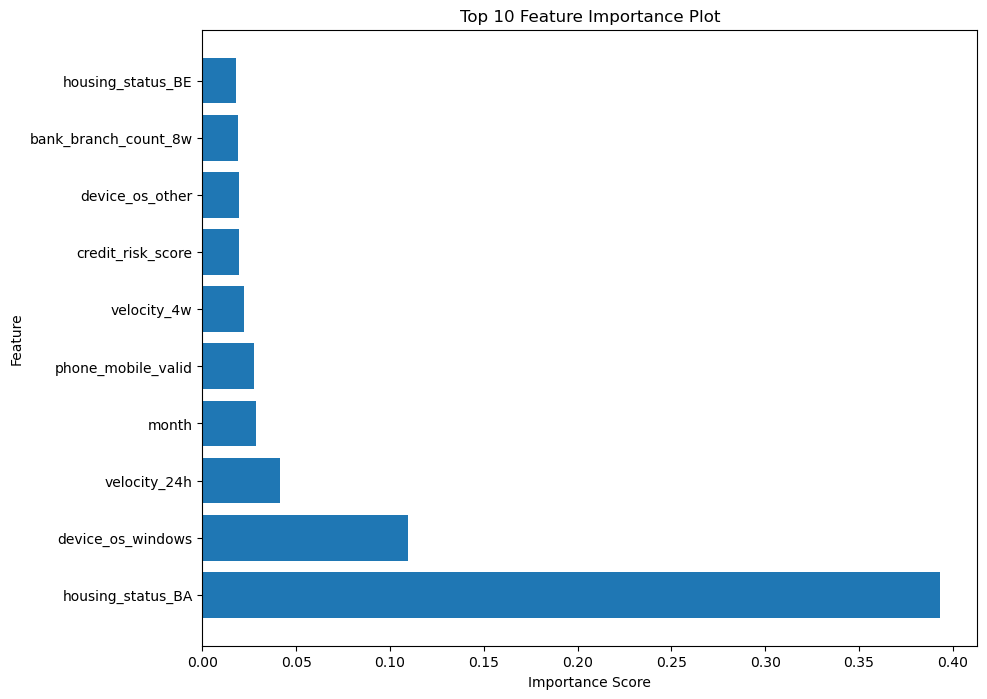

In [27]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

one_hot_feature_names = final.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=cat_columns)
all_feature_names = list(one_hot_feature_names) + list(X_train.columns.difference(cat_columns))

feature_importance = final.named_steps['xgb'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select only the top 10 features
top_10_features = feature_importance_df.head(10)

# Plot the top 10 feature importance
plt.figure(figsize=(10, 8))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance Plot')
plt.show()

#### Confusion Matrix

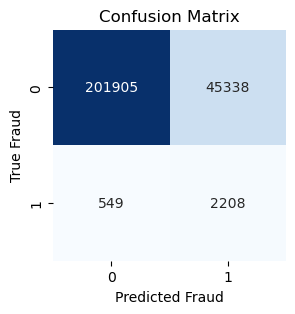

              precision    recall  f1-score   support

           0       1.00      0.82      0.90    247243
           1       0.05      0.80      0.09      2757

    accuracy                           0.82    250000
   macro avg       0.52      0.81      0.49    250000
weighted avg       0.99      0.82      0.89    250000



In [30]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Fraud')
plt.ylabel('True Fraud')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In [31]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_pred_proba)

f1_macro = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")
print(f"F1-Macro: {f1_macro}")

Accuracy: 0.816452
ROC-AUC: 0.8937241407124236
F1-Macro: 0.492874093384862


## Conclusion

Overall the model has very solid performance, especially considering the high class imbalance.
+ A ROC-AUC score of 0.89 indicates that the model is significantly better at assigning classes than random guessing (ROC-AUC of 0.5)
+ According to the confusion matrix, the model correctly predicts 79.8% of all of the instances of fraud.